In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv(r'F:/Advertising.csv',index_col=0,header=0)
data.head() #dependent is sales variables on independent other variables.

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
print(data.dtypes)
print(data.shape)
print(data.describe()) #all are numerical so esay to take linear reg. if categorial , then need to convert in numerics

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


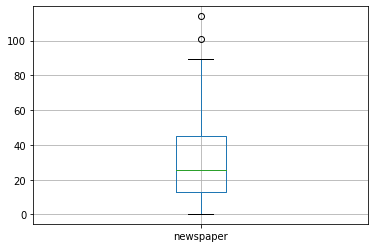

In [4]:
data.boxplot(column="newspaper")
#(there should be no outliers in data, we found in news[paper] as 2 data, 
#which is wrong data ener as 75% is 45 , which is far big value in max . 
#which shows data is far away from investment as shown in plot")

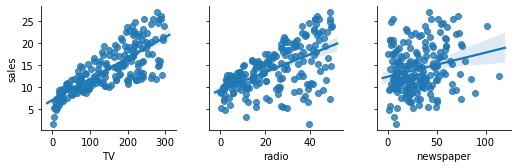

In [5]:
#Assumption of Linearity:Every ind var should have a linear relationship with the dep var.
sns.pairplot(data,x_vars=["TV","radio","newspaper"],y_vars="sales",kind="reg")
#reg means regression , if you change it to scatter, it will show scatter plot. This is x is indpndt and y is dependent as form linear regression. 

In [6]:
#create x that those which satisfy linearity
X=data[['TV','radio','newspaper']] #removed newspaper as its graphs is not linear. 
Y=data['sales'] # the dependent variable be normally in distribution.

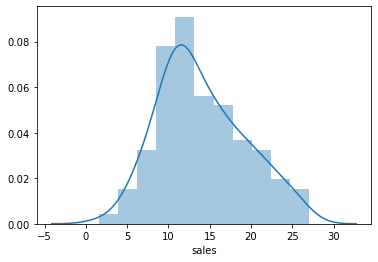

In [7]:
sns.distplot(Y,hist=True)

In [8]:
"""
# Log transformation
import numpy as np
Y_log  = np.log(Y)
"""
# if normal graph is not apper only then we can log transform that data.

'\n# Log transformation\nimport numpy as np\nY_log  = np.log(Y)\n'

In [9]:
#sns.distplot(Y_log,hist=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002B201CCC748>,
      dtype=object)

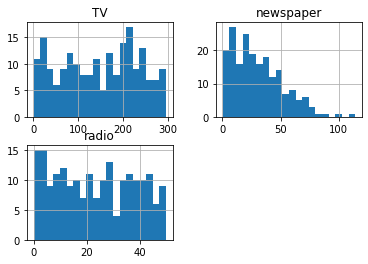

In [10]:
X.hist(bins=20) # here newspaper shows positive or right skewness.         

In [11]:
# do not perform log transform excution more than one, run this only once.
from scipy.stats import skew
data_num_skew = X.apply(lambda x: skew(x.dropna()))# apply is a logic which use to apply on each n every thing present in X, now ut will drop null value of X(tv, radio,newspaper) and run skewness.
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)] # this shows higher variable skewness

print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index]) # this is use to stop infinite value for skewness, log1p is use so that missing value for skewness is not take value to infinity.



TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


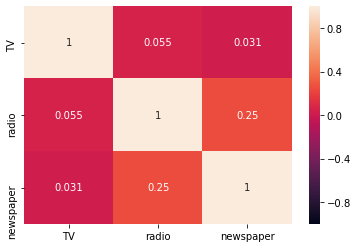

In [12]:
# there should be no multi-colinearity in the data and there are 2 ways to check multi-colinearity.

corr_df=X.corr(method="pearson")# techique to use pearson to find corelation as there are many other.
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns #This will fetch x variable as tv, radio, news paper
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])] # this will run VIF in loop for each variable and show its vif values.
vif_df.round(2) #round 2 will show decimal point by 3,


,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [14]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=10)  
#Don't change the LHS data of(xtrain, xtest) as this will affect in result bcoz it will RHS will run wrt to LHS, we can change size 0.2 or 0.3.

In [15]:
print(Y_train)

191    10.8
8      13.2
27     15.0
139     9.6
59     23.8
       ... 
114    15.9
65     18.0
16     22.4
126    10.6
10     10.6
Name: sales, Length: 160, dtype: float64


In [16]:
from sklearn.linear_model import LinearRegression
#create a model object
lm=LinearRegression() #build model
#train the model object
lm.fit(X_train,Y_train)# train that model

#print intercept and coefficent
print(lm.intercept_)
print(lm.coef_)

3.353291385815151
[ 0.0437425   0.19303708 -0.04895137]


In [17]:
#pair the features name with the coefficent
print(list(zip(X.columns,lm.coef_)))
#this shows that if i invest in newspaper my sales will go down.

[('TV', 0.04374250157742167), ('radio', 0.19303707897345293), ('newspaper', -0.04895136822248788)]


In [18]:
X1=100
X2=100
X3=100
Y_pred=3.353291385815151+(0.04374250157742167*X1)+(0.19303707897345293*X2)+(-0.04895136822248788*X3)
print(Y_pred)
# this shows profit is below shown as 22000 $

22.136112618653826


In [19]:
X1=100
X2=100
X3=0
Y_pred=3.353291385815151+(0.04374250157742167*X1)+(0.19303707897345293*X2)+(-0.04895136822248788*X3)
print(Y_pred)
# As if i removed newspaper which shows X3=0, this shows profit is as 27000 $. I removed as newspaper value ws in -ve. now sales goes high.

27.031249440902613


In [20]:
Y_pred=lm.predict(X_test)
print(Y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [21]:
new_df=pd.DataFrame()
new_df=X_test

new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,TV,radio,newspaper,Actual sales,Predicted sales
60,210.7,29.5,2.332144,18.4,18.150269
6,8.7,48.9,4.330733,7.2,12.961369
21,218.4,27.7,3.996364,18.0,18.058153
199,283.6,42.0,4.207673,25.5,23.660251
53,216.4,41.7,3.703768,22.6,20.687510
20,147.3,23.9,3.000720,14.6,14.263259
163,188.4,18.1,3.280911,14.9,14.927745
56,198.9,49.4,4.110874,23.7,21.388474
70,216.8,43.9,3.339322,22.3,21.147529
3,17.2,45.9,4.252772,9.3,12.757885


In [22]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1) #len(y) is no, of obs and X.shape is No. of variable
print(adjusted_r_squared)


0.834801071903532
2.59297691109306
0.8322725168816474


In [23]:
print(min(Y_test))
print(max(Y_test))

1.6
25.5


In [24]:
new_df["Deviation"]=new_df["Actual sales"]-new_df["Predicted sales"] #difffrence of value between actual and predicted.
new_df.to_excel("Sales Prediction.xlsx",header=True,index=True)
new_df.head()


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TV,radio,newspaper,Actual sales,Predicted sales,Deviation
60,210.7,29.5,2.332144,18.4,18.150269,0.249731
6,8.7,48.9,4.330733,7.2,12.961369,-5.761369
21,218.4,27.7,3.996364,18.0,18.058153,-0.058153
199,283.6,42.0,4.207673,25.5,23.660251,1.839749
53,216.4,41.7,3.703768,22.6,20.687510,1.912490


In [25]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=10)  
#Don't change the LHS data of(xtrain, xtest) as this will affect in result bcoz it will RHS will run wrt to LHS, we can change size 0.2 or 0.3.

In [26]:
from sklearn.linear_model import Ridge
lm = Ridge()
lm.fit(X_train,Y_train)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)
"""
previous values:
3.353291385815151
[ 0.0437425   0.19303708 -0.04895137]
"""
# ridge use to take all variables and then work on it and also have to work on unwanted variables

3.3522471725965985
[ 0.04374234  0.19302603 -0.04853131]


'\nprevious values:\n3.353291385815151\n[ 0.0437425   0.19303708 -0.04895137]\n'

In [27]:
Y_pred=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)


"""
Previous values:
0.834801071903532
2.59297691109306
0.8322725168816474
"""


0.8348082644975935
2.5929204626839977
0.8322798195664342


'\nPrevious values:\n0.834801071903532\n2.59297691109306\n0.8322725168816474\n'

In [28]:
from sklearn.linear_model import Lasso
lm = Lasso()
lm.fit(X_train,Y_train)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

#if you have taken particular variable for regresson than lasso will do great thing as it will make zero unwanted variables 

3.336794058220317
[ 0.04362374  0.18766033 -0.        ]


In [29]:
Y_pred=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)


# other word for lasso is L1 and ridge is L2

0.8360506658527163
2.5831514271094234
0.8335412372688292


In [30]:
#fit(X_train, Y_train)-->sklearn
#Y~X1+X2+X3,data=df-->statsmodels


In [31]:
new_df=pd.DataFrame()
new_df=X_train

new_df["sales"]=Y_train
new_df.shape


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(160, 4)

In [32]:
new_df

,TV,radio,newspaper,sales
191,39.5,41.1,1.916923,10.8
8,120.2,19.6,2.533697,13.2
27,142.9,29.3,2.610070,15.0
139,43.0,25.9,3.068053,9.6
59,210.8,49.6,3.655840,23.8
...,...,...,...,...
114,209.6,20.6,2.459589,15.9
65,131.1,42.8,3.397858,18.0
16,195.4,47.7,3.987130,22.4
126,87.2,11.8,3.292126,10.6


In [33]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio + newspaper', data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

#AIC = Akaike Information Criteria = where data changes and model remains the same(As data is elimniated with various algorithm and then remaining data is coded)

#BIC = Bayes Information Criteria
#RMSE is used when data is same but algorithm is different(used by many algoritm as ridge, linear, lasso,etc)

#P value is shown in result as newspaper is greater than 0.05

#There should be no auto corelation data , can be check using durbin watson, durbin-watson value lies btewn 0 to 4.
#values close to 2 indiactes no auto-corelation
#values close to 4 indiactes no negetive auto-corelation
#values close to 0 indiactes auto-corelation




"""
H0-->Null Hypothesis
opp of alternate hypothesis

H1-->Alternate hypothesis
Stmt which you want to be proved as True


H0-->There is no significant relationship between X and Y

H1-->There is a significant relationship between X and Y

p-value<0.05
If pvalue is low, the null must go
If pvalue is high, the null must fly


Confidence Interval-->95%
"""

Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           1.10e-85
Time:                        21:00:27   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

'\nH0-->Null Hypothesis\nopp of alternate hypothesis\n\nH1-->Alternate hypothesis\nStmt which you want to be proved as True\n\n\nH0-->There is no significant relationship between X and Y\n\nH1-->There is a significant relationship between X and Y\n\np-value<0.05\nIf pvalue is low, the null must go\nIf pvalue is high, the null must fly\n\n\nConfidence Interval-->95%\n'

In [34]:
Y_pred_new=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)



0.8360506658527163
2.5831514271094234
0.8335412372688292


In [35]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio', data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

#Compare after removing newspaper
#Now adjusted Rsquare incresae due to eliminating newspaper.
#AIC n BIC decrese so this good model
#P value is better
#Durbin - watson also decreased which is also near to idEAL value(2 is ideal value)



Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           3.47e-87
Time:                        21:00:27   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [36]:
Y_pred_new=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

#adjusted R is slightly shift so below value is repeatedly check , so to check its varies and decreased.

0.8360506658527163
2.5831514271094234
0.8335412372688292


Text(0, 0.5, 'Residuals')

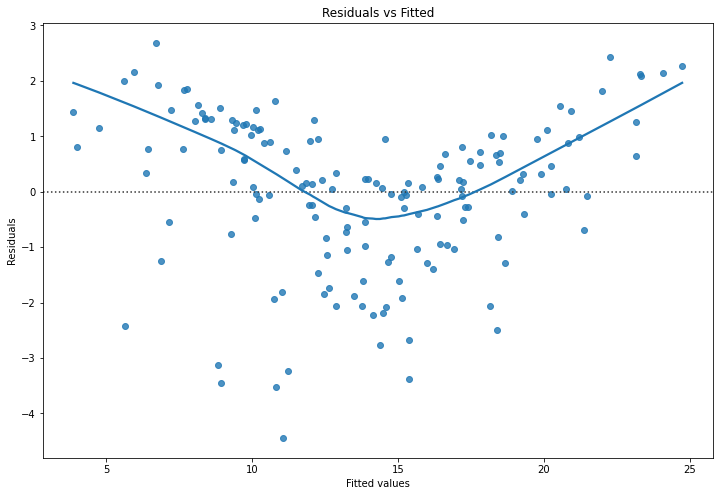

In [37]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constant term for intercept)
model_fitted_y = lm_model.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'sales', data=new_df, lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


#residual means error
#error should be random, can be checked using residual vs fitted plot
#In graph line should nor repeated as sine signal graph as up down .


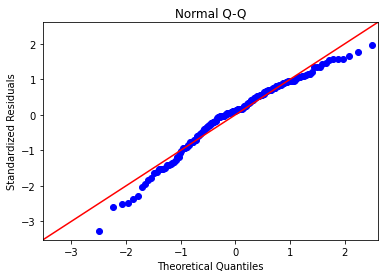

In [38]:
res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res,  fit=True, line='45') # 45 is angle degree to plot graph
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show() 

#errors should follow normal distribution can be checked using normal Quantile-Quantile plot
#res means residual
#scatter points meeting line that means it is good model/normal distribution, If not meeting that means errors are not following proper
#

Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

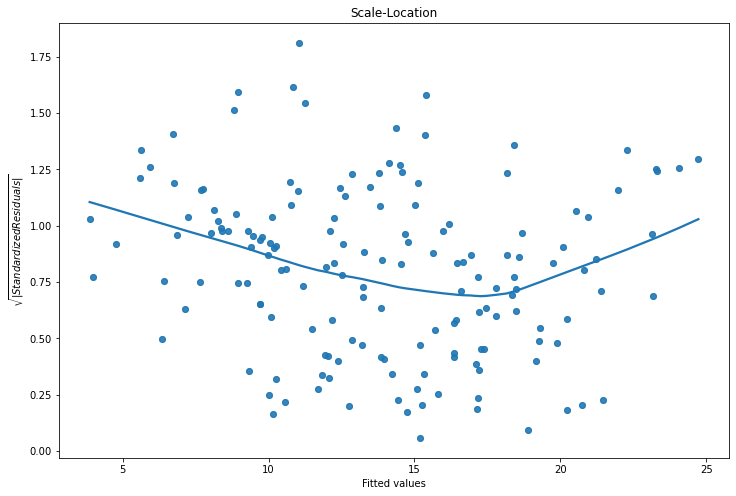

In [39]:
# normalized residuals
model_norm_residuals = lm_model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')


# Error shld follow a constant variance also know as asumption of homoscedasticity means equal variance can be check using scale loccation plot.
# In graph line is straight horizontal then variance is prefect, In this graph our model is also better, But if the shape is V, then model is poor.
# heteroscedasticity is called if V shape graph is shown as called as bad graph output.

In [40]:
"""
#Linear Regression procedure
1. Create a dataframe properly----pd.read_csv,excel
2. Assumption 1-- There should be no outliers in data(Do EDA as info,describe b4 finding outliears)---> pd.boxplot()
3. Assumption 2--- Assumption of linearity ---> pairplot is use to realtionship of x n y.... as it shows no relation with newspaper.
4. create X n Y
5. Assumption 3--Assumption of normality of Y--->displot(),log().
6. handle the skewness in the X---->if have high skew in any variable then use log1p() on that variable
7. there should be no multi-colinearity. this can be usechecking corealtion() n heatmap(),vif()
8. Then split data in test and train and also dive x n y both as train n test data.
9. Build the model-------
                       a. create mmodel--->obj=linear regression()
                       b. Train the model --->obj.fit (X_train , Y_train)
                       c.predict using model---> obj . predict(x_test)
                         (same process for other algorithm as lasso and ridge,, just change linear to lasso and ridge)
10.Evaluating the model:
                      a.Rsquare
                      b.Adjusted square
                      c. RMSE
                      d. P values
11. Assumption 5---There should be no auto-correlation in data----> find this using durbin - watson test.
12. Assumption 6---Errors should be random---> Fitted vs residual plot
13. Assumption 7---Error should follow distribution -----> Normal QQ plot
14. Assumption 8---Errors should follow constant variance----> Scale Location plot.
15. Tunning the model---> manual featrure selection, eliminate p-value, Ridge, lasso.
"""





'\n#Linear Regression procedure\n1. Create a dataframe properly----pd.read_csv,excel\n2. Assumption 1-- There should be no outliers in data(Do EDA as info,describe b4 finding outliears)---> pd.boxplot()\n3. Assumption 2--- Assumption of linearity ---> pairplot is use to realtionship of x n y.... as it shows no relation with newspaper.\n4. create X n Y\n5. Assumption 3--Assumption of normality of Y--->displot(),log().\n6. handle the skewness in the X---->if have high skew in any variable then use log1p() on that variable\n7. there should be no multi-colinearity. this can be usechecking corealtion() n heatmap(),vif()\n8. Then split data in test and train and also dive x n y both as train n test data.\n9. Build the model-------\n                       a. create mmodel--->obj=linear regression()\n                       b. Train the model --->obj.fit (X_train , Y_train)\n                       c.predict using model---> obj . predict(x_test)\n                         (same process for other 

# Stochastic gradeint descent

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X) #fit use flow within the range and transform is use to match X values with given ranges in scaler
print(X)
#Only use for X variable bcoz there are many variable avialable in X , as in Y the varaible is not change bcoz it is dependable.

[[ 9.69852266e-01  9.81522472e-01  1.27054817e+00]
 [-1.19737623e+00  1.08280781e+00  7.84008452e-01]
 [-1.51615499e+00  1.52846331e+00  1.27219508e+00]
 [ 5.20496822e-02  1.21785493e+00  1.07922051e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.07727442e+00]
 [-1.61540845e+00  1.73103399e+00  1.36239293e+00]
 [-1.04557682e+00  6.43904671e-01  5.26522686e-02]
 [-3.13436589e-01 -2.47406325e-01 -7.16694174e-01]
 [-1.61657614e+00 -1.42906863e+00 -2.84612391e+00]
 [ 6.16042873e-01 -1.39530685e+00 -6.14011337e-02]
 [-9.45155670e-01 -1.17923146e+00  8.52446540e-02]
 [ 7.90028350e-01  4.96973404e-02 -1.78601844e+00]
 [-1.43908760e+00  7.99208859e-01  1.21484164e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.21367806e+00]
 [ 6.66253447e-01  6.50657027e-01  8.06377739e-01]
 [ 5.64664612e-01  1.65000572e+00  9.64860512e-01]
 [-9.25304978e-01  9.00494200e-01  1.84160153e+00]
 [ 1.56887609e+00  1.10306488e+00  1.02549162e+00]
 [-9.08957349e-01 -1.86635121e-01 -2.23359761e-01]
 [ 3.00679600e-03  4.29449843e-

In [42]:
from sklearn.model_selection import train_test_split

#split the data into train and test
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=10)

In [43]:
from sklearn.linear_model import SGDRegressor
lm=SGDRegressor(learning_rate="constant",eta0=0.01,random_state=10,max_iter=100)
lm.fit(X_train,Y_train)

#eta0 is known as learning rate which value is from 0,00001 to 0.9
#max_iter means 100 nos of obs are group to execute


#print intercept and coefficient
print(lm.intercept_)
print(lm.coef_)

"""3.3522471725965985
[ 0.04374234  0.19302603 -0.04853131]
"""

"""[6.79975933e+10]
[ 1.21678820e+12 -2.70583999e+11  5.46220480e+11]"""

[14.15311875]
[ 3.72265799  2.79027528 -0.01680304]


'[6.79975933e+10]\n[ 1.21678820e+12 -2.70583999e+11  5.46220480e+11]'

In [44]:
Y_pred_new=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)


0.834240960574798
2.5973689697453377
0.8317038324203306


In [45]:
from sklearn.linear_model import SGDRegressor
lm=SGDRegressor(learning_rate="constant",eta0=0.01,random_state=10,max_iter=1000)
lm.fit(X_train,Y_train)

#eta0 is known as learning rate which value is from 0,00001 to 0.9
#max_iter means 100 nos of obs are group to execute


#print intercept and coefficient
print(lm.intercept_)
print(lm.coef_)

"""3.3522471725965985
[ 0.04374234  0.19302603 -0.04853131]
"""

"""[6.79975933e+10]
[ 1.21678820e+12 -2.70583999e+11  5.46220480e+11]"""

[14.15311875]
[ 3.72265799  2.79027528 -0.01680304]


'[6.79975933e+10]\n[ 1.21678820e+12 -2.70583999e+11  5.46220480e+11]'

In [46]:
Y_pred_new=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)


0.834240960574798
2.5973689697453377
0.8317038324203306


In [47]:
from sklearn.linear_model import SGDRegressor
lm=SGDRegressor(learning_rate="constant",eta0=0.001,random_state=10,max_iter=10000)
lm.fit(X_train,Y_train)

#eta0 is known as learning rate which value is from 0.0001 to 0.9
#max_iter means 100 nos of obs are group to execute


#print intercept and coefficient
print(lm.intercept_)
print(lm.coef_)

"""3.3522471725965985
[ 0.04374234  0.19302603 -0.04853131]
"""

"""[6.79975933e+10]
[ 1.21678820e+12 -2.70583999e+11  5.46220480e+11]"""

[14.0883131]
[ 3.73344104  2.83596993 -0.02634317]


'[6.79975933e+10]\n[ 1.21678820e+12 -2.70583999e+11  5.46220480e+11]'

In [48]:
Y_pred_new=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)


0.835585606522484
2.5868125214610256
0.8330690596835424
